In [66]:
# You are a cab rental start-up company. You have successfully run the pilot project and now want to launch your cab service across the country.
# You have collected the historical data from your pilot project and now have a requirement to apply analytics for fare prediction.
# You need to design a system that predicts the fare amount for a cab ride in the city. 

In [67]:
#  import required libraries
import os as os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV

In [68]:
os.chdir("E:/JUPYTER/Data Science/Project 4")
print(os.getcwd())

E:\JUPYTER\Data Science\Project 4


In [69]:
# Loading the data
train = pd.read_csv("train_cab_fare.csv")
test = pd.read_csv("test_cab_fare.csv")
train

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [70]:
test

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
...,...,...,...,...,...,...
9909,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6


In [71]:
# Understanding the dataset
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [72]:
train.tail()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0
16066,8.5,2011-12-14 06:24:33 UTC,-74.002111,40.729755,-73.983877,40.761975,NaN


In [73]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [74]:
test.tail()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
9909,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6
9913,2015-01-18 14:06:23 UTC,-73.988022,40.754070,-74.000282,40.759220,6


In [75]:
train.shape

(16067, 7)

In [76]:
test.shape

(9914, 6)

In [77]:
train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [78]:
test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [79]:
train.describe

<bound method NDFrame.describe of       fare_amount          pickup_datetime  pickup_longitude  pickup_latitude  \
0             4.5  2009-06-15 17:26:21 UTC        -73.844311        40.721319   
1            16.9  2010-01-05 16:52:16 UTC        -74.016048        40.711303   
2             5.7  2011-08-18 00:35:00 UTC        -73.982738        40.761270   
3             7.7  2012-04-21 04:30:42 UTC        -73.987130        40.733143   
4             5.3  2010-03-09 07:51:00 UTC        -73.968095        40.768008   
...           ...                      ...               ...              ...   
16062         6.5  2014-12-12 07:41:00 UTC        -74.008820        40.718757   
16063        16.1  2009-07-13 07:58:00 UTC        -73.981310        40.781695   
16064         8.5  2009-11-11 11:19:07 UTC        -73.972507        40.753417   
16065         8.1  2010-05-11 23:53:00 UTC        -73.957027        40.765945   
16066         8.5  2011-12-14 06:24:33 UTC        -74.002111        40.7297

In [80]:
test.describe

<bound method NDFrame.describe of               pickup_datetime  pickup_longitude  pickup_latitude  \
0     2015-01-27 13:08:24 UTC        -73.973320        40.763805   
1     2015-01-27 13:08:24 UTC        -73.986862        40.719383   
2     2011-10-08 11:53:44 UTC        -73.982524        40.751260   
3     2012-12-01 21:12:12 UTC        -73.981160        40.767807   
4     2012-12-01 21:12:12 UTC        -73.966046        40.789775   
...                       ...               ...              ...   
9909  2015-05-10 12:37:51 UTC        -73.968124        40.796997   
9910  2015-01-12 17:05:51 UTC        -73.945511        40.803600   
9911  2015-04-19 20:44:15 UTC        -73.991600        40.726608   
9912  2015-01-31 01:05:19 UTC        -73.985573        40.735432   
9913  2015-01-18 14:06:23 UTC        -73.988022        40.754070   

      dropoff_longitude  dropoff_latitude  passenger_count  
0            -73.981430         40.743835                1  
1            -73.998886    

In [81]:
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963642,40.768014,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [82]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [83]:
# Converting the fare amount from oject to numneric
train["fare_amount"] = pd.to_numeric(train["fare_amount"],errors = "coerce")

In [84]:
train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [85]:
# Droping NA values
train.dropna(subset = ["pickup_datetime"])

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [86]:
# Converting pickup_datetime from object to datetime
train["pickup_datetime"] = pd.to_datetime(train["pickup_datetime"], format='%Y-%m-%d %H:%M:%S UTC', errors='coerce')

In [87]:
#  we will be seperating the pickup_datetime function into year, month, day etc
train['Year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

In [88]:
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
Year                        float64
Month                       float64
Date                        float64
Day                         float64
Hour                        float64
Minute                      float64
dtype: object

In [89]:
# Converting pickup_datetime from object to datetime
test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"], format='%Y-%m-%d %H:%M:%S UTC', errors='coerce')

In [90]:
#  we will be seperating the pickup_datetime function into year, month, day etc
test['Year'] = test['pickup_datetime'].dt.year
test['Month'] = test['pickup_datetime'].dt.month
test['Date'] = test['pickup_datetime'].dt.day
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Hour'] = test['pickup_datetime'].dt.hour
test['Minute'] = test['pickup_datetime'].dt.minute

In [91]:
test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
Year                          int32
Month                         int32
Date                          int32
Day                           int32
Hour                          int32
Minute                        int32
dtype: object

In [92]:
train = train.drop(train[train['pickup_datetime'].isnull()].index, axis = 0)
print(train.shape)
print(train['pickup_datetime'].isnull().sum())

(16066, 13)
0


In [93]:
train['passenger_count'].describe()

count    16011.000000
mean         2.625171
std         60.846021
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [94]:
# the passenger count of 5345 is not possible because the number of maximum passengers that can be in SUV is 6

In [95]:
train = train.drop(train[train['passenger_count'] > 6].index, axis = 0)

In [96]:
train['passenger_count'].describe()

count    15991.000000
mean         1.643701
std          1.267504
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [97]:
train = train.drop(train[train['passenger_count'] == 0].index, axis = 0)

In [98]:
train['passenger_count'].describe()

count    15934.000000
mean         1.649581
std          1.265943
min          0.120000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [99]:
train["passenger_count"].sort_values(ascending = True)

8862     0.12
16048    1.00
22       1.00
21       1.00
20       1.00
         ... 
8076      NaN
8139      NaN
8259      NaN
8306      NaN
16066     NaN
Name: passenger_count, Length: 15989, dtype: float64

In [100]:
#  removing passenger_count missing values rows
train = train.drop(train[train['passenger_count'].isnull()].index, axis = 0)
print(train.shape)
print(train['passenger_count'].isnull().sum())

(15934, 13)
0


In [101]:
# there is one value of 0.12 present in the passenger_count which is not possible hence we will be removing it also

In [102]:
train = train.drop(train[train['passenger_count'] == 0.12].index, axis = 0)

In [103]:
train.shape

(15933, 13)

In [104]:
# sort the fare_amount inton descending order to find if there is any outlier are present or not

In [105]:
train['fare_amount'].sort_values(ascending = False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 15933, dtype: float64

In [106]:
# count the number of rows where fare amount is less than 0
Counter(train['fare_amount'] < 0)

Counter({False: 15930, True: 3})

In [107]:
# remove the negative values in the fare_amount column
train = train.drop(train[train['fare_amount'] < 0].index, axis = 0)

In [108]:
train.shape

(15930, 13)

In [109]:
train['fare_amount'].min()

np.float64(0.0)

In [110]:
# removing all the value of tyhe fare_amount closer to 0
train = train.drop(train[train['fare_amount'] < 1].index, axis = 0)
train.shape

(15928, 13)

In [111]:
# removing the outliers in the fare_amount especially the top 3 values which have a huge difference
train = train.drop(train[train['fare_amount'] > 454].index, axis = 0)
train.shape

(15926, 13)

In [112]:
# removing the missing values rows in the fare_amount 
train = train.drop(train[train['fare_amount'].isnull()].index, axis = 0)
print(train.shape)
print(train['fare_amount'].isnull().sum())

(15902, 13)
0


In [113]:
train['fare_amount'].sort_values(ascending = False)

607     453.00
980     434.00
1335    180.00
1483    165.00
6630    128.83
         ...  
4367      2.50
6297      2.50
3558      2.50
6226      2.50
1427      1.14
Name: fare_amount, Length: 15902, dtype: float64

In [114]:
train['fare_amount'].describe()

count    15902.000000
mean        11.376356
std         10.814908
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

In [115]:
# latitude can range from -90 to 90
# longitude can range from -180 to 180
# we need to drop all the latitude values less than -90
train[train["pickup_latitude"] < -90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute


In [116]:
train[train["pickup_latitude"] > 90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011.0,7.0,30.0,5.0,11.0,15.0


In [117]:
# removing the outliers who are not in range
train = train.drop(train[train['pickup_latitude'] < -90 ].index, axis = 0)
train = train.drop(train[train['pickup_latitude'] > 90 ].index, axis = 0)
print(train.shape)

(15901, 13)


In [120]:
# checking the pickup_longitude range for less than -180
train[train["pickup_longitude"] < -180]


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute


In [121]:
train[train["pickup_longitude"] > 180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute


In [122]:
#  checking now for the dropoff latitude and longitude
train[train["dropoff_latitude"] < -90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute


In [123]:
train[train["dropoff_latitude"] > 90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute


In [124]:
train[train["dropoff_longitude"] < -180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute


In [125]:
train[train["dropoff_longitude"] > 180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute


In [126]:
train.shape

(15901, 13)

In [127]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [128]:
# data-preprocessing and cleaning done
# calculating the haversine distance now

In [129]:
# we have a given pickup latitude and lognitude , dropoff latitude and longitude
# so we need to calculate the distance using the haversine formula and we will create a new variable called distance

from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1 = a[0]
    lat1 = a[1]
    lon2 = a[2]
    lat2 = a[3]

    "Calculating the great circle between two points on the earth(specified in decimal degrees)"
    # convert decimal degrees into adians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    # radius of the eartyh in km is 6371
    km = 6371 * c
    return km

In [137]:
train["distance"] = train[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].apply(haversine, axis = 1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5672\815780774.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon1 = a[0]
C:\Users\DELL\AppData\Local\Temp\ipykernel_5672\815780774.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lat1 = a[1]
C:\Users\DELL\AppData\Local\Temp\ipykernel_5672\815780774.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon2 = a[2]
C:\Users\DELL\AppData\Local\Temp\ipykernel_5672\815780774.py:10: Futur

In [138]:
test["distance"] = test[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].apply(haversine, axis = 1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5672\815780774.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon1 = a[0]
C:\Users\DELL\AppData\Local\Temp\ipykernel_5672\815780774.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lat1 = a[1]
C:\Users\DELL\AppData\Local\Temp\ipykernel_5672\815780774.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon2 = a[2]
C:\Users\DELL\AppData\Local\Temp\ipykernel_5672\815780774.py:10: Futur

In [139]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


In [140]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [141]:
train.nunique()

fare_amount            459
pickup_datetime      15856
pickup_longitude     13672
pickup_latitude      14110
dropoff_longitude    13763
dropoff_latitude     14136
passenger_count          7
Year                     7
Month                   12
Date                    31
Day                      7
Hour                    24
Minute                  60
distance             15448
dtype: int64

In [142]:
test.nunique()

pickup_datetime      1753
pickup_longitude     9124
pickup_latitude      9246
dropoff_longitude    9141
dropoff_latitude     9360
passenger_count         6
Year                    7
Month                  12
Date                   31
Day                     7
Hour                   24
Minute                 60
distance             9830
dtype: int64

In [143]:
#  checking the outliers in the distance column
train['distance'].sort_values(ascending = False)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
            ...     
4954        0.000000
8629        0.000000
8645        0.000000
11218       0.000000
14485       0.000000
Name: distance, Length: 15901, dtype: float64

In [144]:
train[train["distance"] > 8000]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute,distance
472,2.50,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2.0,2009.0,2.0,22.0,6.0,22.0,48.0,8667.304968
1260,5.70,2011-03-10 20:25:00,-73.973907,40.754743,0.000000,0.000000,2.0,2011.0,3.0,10.0,3.0,20.0,25.0,8665.268588
2397,45.00,2012-06-24 17:11:10,0.000000,0.000000,-74.010230,40.714553,2.0,2012.0,6.0,24.0,6.0,17.0,11.0,8667.454421
4278,7.00,2015-04-07 23:33:02,-73.972702,40.757423,0.000000,0.000000,1.0,2015.0,4.0,7.0,1.0,23.0,33.0,8665.223767
4597,6.90,2010-03-30 07:12:00,0.000000,0.000000,-73.989693,40.754280,1.0,2010.0,3.0,30.0,1.0,7.0,12.0,8666.566030
6188,15.50,2014-07-28 15:04:00,0.000000,0.000000,-73.952980,40.786670,5.0,2014.0,7.0,28.0,0.0,15.0,4.0,8664.191488
6302,16.50,2015-02-27 16:18:58,0.000000,0.000000,-73.936600,40.796543,1.0,2015.0,2.0,27.0,4.0,16.0,18.0,8663.039123
8647,21.50,2014-03-27 18:01:00,-74.001808,40.750782,0.000000,0.000000,1.0,2014.0,3.0,27.0,3.0,18.0,1.0,8667.497512
9147,8.50,2014-07-14 21:37:29,0.000000,0.000000,-74.002037,40.752035,1.0,2014.0,7.0,14.0,0.0,21.0,37.0,8667.542104
10215,13.30,2011-03-18 09:33:41,0.000000,0.000000,-73.990138,40.753392,1.0,2011.0,3.0,18.0,4.0,9.0,33.0,8666.584706


In [ ]:
# the top 23 values in distance column is very high it cant be graeter than 8000 because it is the maximum distance of the earth
# we remove those values the top distance goes down to 127

In [145]:
#  we will remove the rows whose distancee value is very high which is more than 129km
train = train.drop(train[train['distance'] > 130 ].index, axis = 0)
train.shape

(15878, 14)

In [146]:
Counter(train['distance'] == 0)

Counter({False: 15424, True: 454})

In [147]:
Counter(test['distance'] == 0)

Counter({False: 9829, True: 85})

In [148]:
# we need to drop all the distance values which are equal to 0
train = train.drop(train[train['distance'] == 0 ].index, axis = 0)
train.shape

(15424, 14)

In [149]:
test = test.drop(test[test['distance'] == 0 ].index, axis = 0)
test.shape

(9829, 13)

In [150]:
#  we have splitted pickp_datetime into yaer , month, day, hour, minute so pickup_datetime would be irrelevant so we will be dropping it. We have already calculated distance usinfg the pickup and droppoff longitude and latitude respectively. So we will be dropping all those variables

In [151]:
train

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16061,10.9,2009-05-20 18:56:42,-73.994191,40.751138,-73.962769,40.769719,1.0,2009.0,5.0,20.0,2.0,18.0,56.0,3.357490
16062,6.5,2014-12-12 07:41:00,-74.008820,40.718757,-73.998865,40.719987,1.0,2014.0,12.0,12.0,4.0,7.0,41.0,0.850044
16063,16.1,2009-07-13 07:58:00,-73.981310,40.781695,-74.014392,40.715527,2.0,2009.0,7.0,13.0,0.0,7.0,58.0,7.867638
16064,8.5,2009-11-11 11:19:07,-73.972507,40.753417,-73.979577,40.765495,1.0,2009.0,11.0,11.0,2.0,11.0,19.0,1.469105


In [152]:
drop_columns = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'Minute']
train = train.drop(drop_columns, axis = 1)

In [154]:
train.head()

,fare_amount,passenger_count,Year,Month,Date,Day,Hour,distance
0,4.5,1.0,2009.0,6.0,15.0,0.0,17.0,1.030764
1,16.9,1.0,2010.0,1.0,5.0,1.0,16.0,8.450134
2,5.7,2.0,2011.0,8.0,18.0,3.0,0.0,1.389525
3,7.7,1.0,2012.0,4.0,21.0,5.0,4.0,2.799270
4,5.3,1.0,2010.0,3.0,9.0,1.0,7.0,1.999157


In [156]:
train.dtypes

fare_amount        float64
passenger_count    float64
Year               float64
Month              float64
Date               float64
Day                float64
Hour               float64
distance           float64
dtype: object

In [157]:
test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
Year                          int32
Month                         int32
Date                          int32
Day                           int32
Hour                          int32
Minute                        int32
distance                    float64
dtype: object

In [158]:
drop_columns = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'Minute']
test = test.drop(drop_columns, axis = 1)

In [159]:
test.head()

,passenger_count,Year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


In [160]:
test.dtypes

passenger_count      int64
Year                 int32
Month                int32
Date                 int32
Day                  int32
Hour                 int32
distance           float64
dtype: object

In [162]:
# converting variables of float datatype to int datatype
train["passenger_count"] = train["passenger_count"].astype('int64')
train["Year"] = train["Year"].astype('int64')
train["Month"] = train["Month"].astype('int64')
train["Date"] = train["Date"].astype('int64')
train["Day"] = train["Day"].astype('int64')
train["Hour"] = train["Hour"].astype('int64')

In [163]:
train.dtypes

fare_amount        float64
passenger_count      int64
Year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [164]:
# data Visualization
# visualization of the following

# 1 Number of passengers affecting the fare
# 2. Pickup date and time affecting the fare
# 3. Day of the week affecting the fare
# 4. Distance affecting the fare

<Axes: xlabel='passenger_count', ylabel='count'>

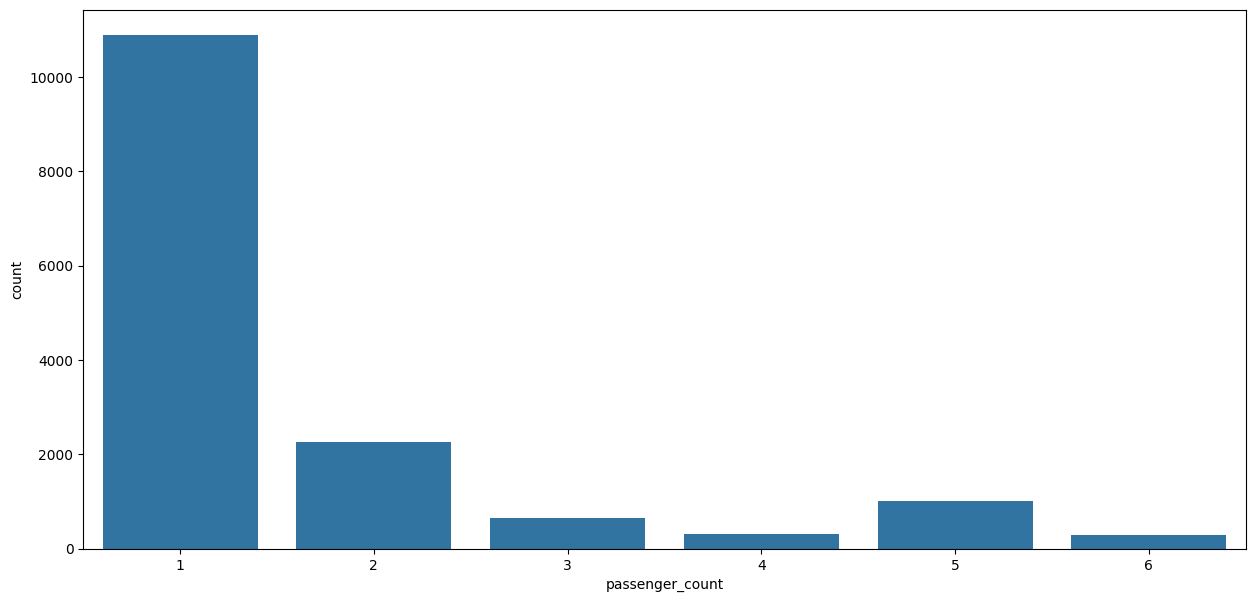

In [165]:
# counting the number of passenger vs number of rides
plt.figure(figsize = (15,7))
sns.countplot(x = 'passenger_count', data = train)

In [ ]:
# Single and double travelling passengers are the most frequent rides taken

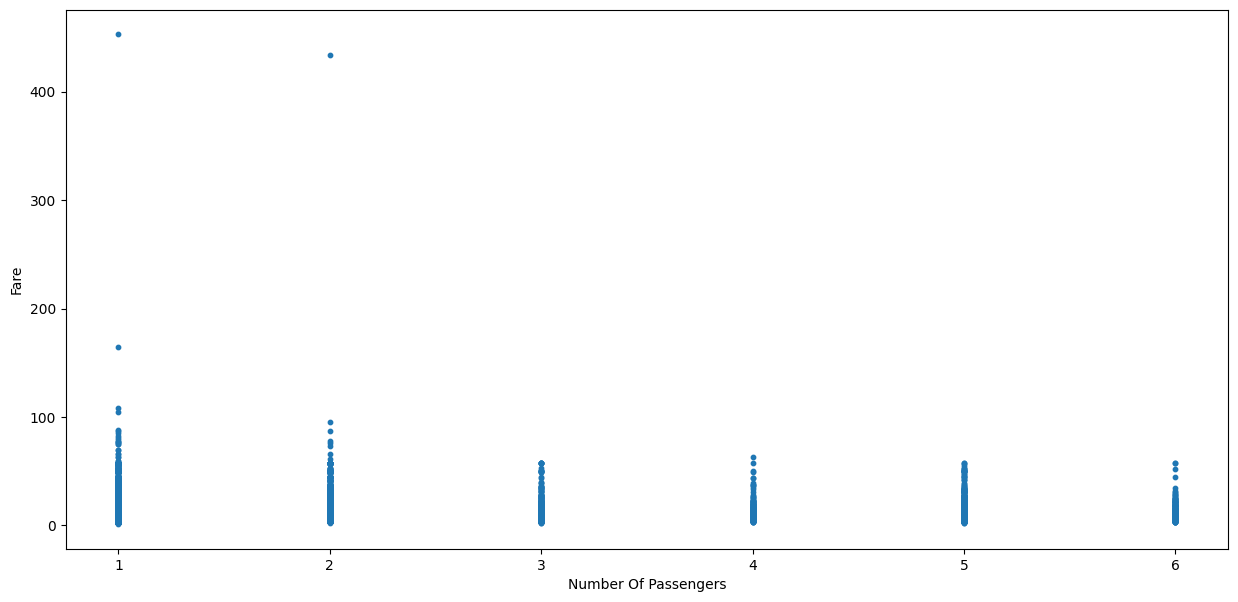

In [168]:
# relationship between number of passenger and fare
plt.figure(figsize = (15,7))
plt.scatter(x = train['passenger_count'], y = train['fare_amount'], s =10)
plt.xlabel('Number Of Passengers')
plt.ylabel('Fare')
plt.show()

In [169]:
# Singe and double travelling passenger rides had a maximum fare

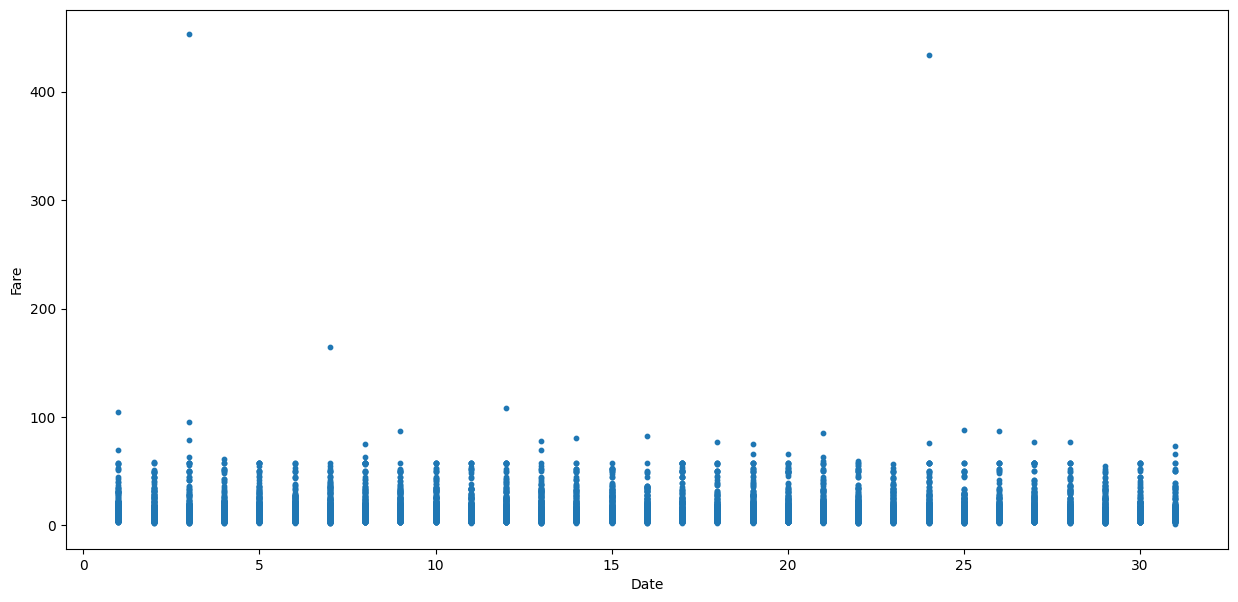

In [170]:
# relationship between date and fare
plt.figure(figsize = (15,7))
plt.scatter(x = train['Date'], y = train['fare_amount'], s =10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

In [171]:
#  fare is almost equal on all the days of the month

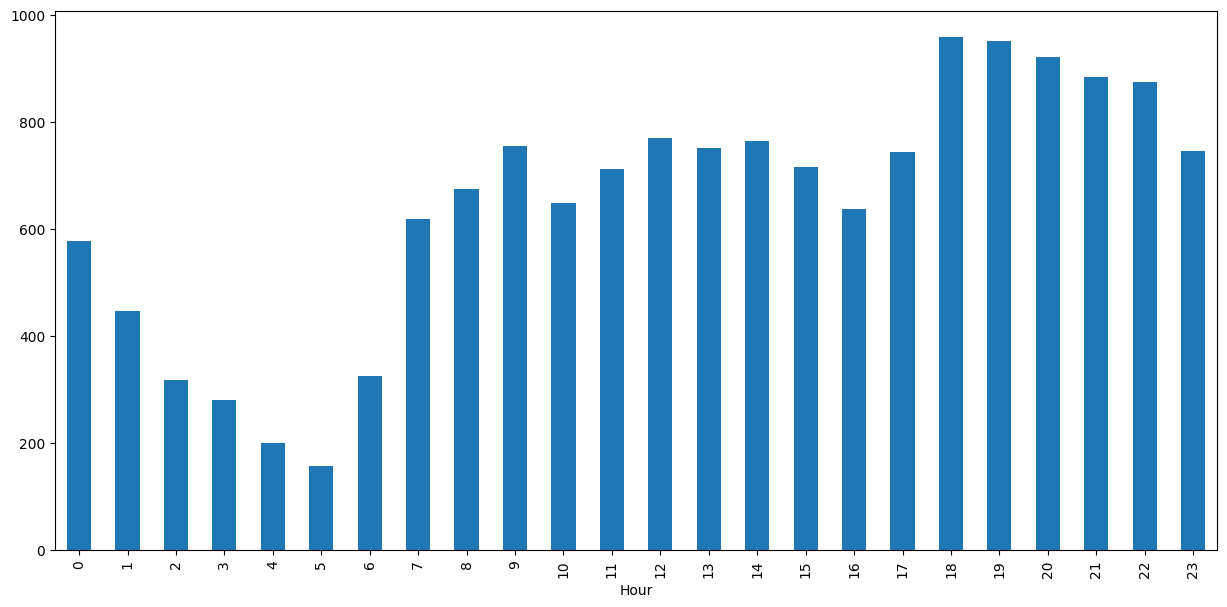

In [172]:
# relationship between hour and fare
plt.figure(figsize = (15,7))
train.groupby(train['Hour'])['Hour'].count().plot(kind = "bar")
plt.show()

In [ ]:
# lowest number of cabs at around 5am and highest number of cabs between 6pm to 7pm 

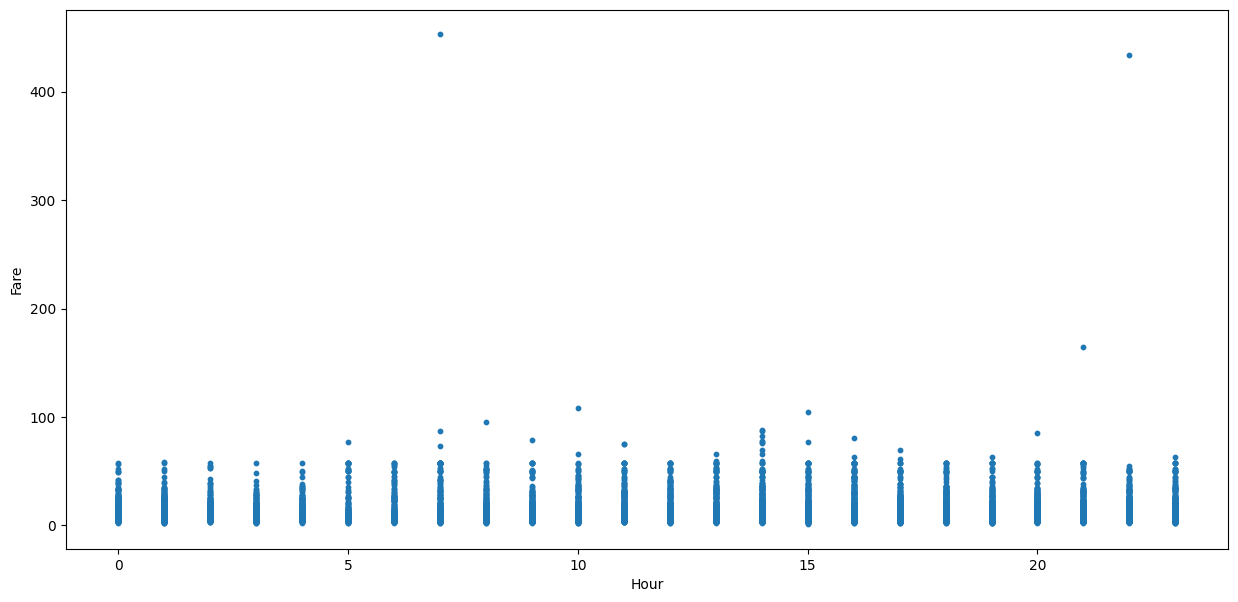

In [173]:
# relationship between time of the day and fare
plt.figure(figsize = (15,7))
plt.scatter(x = train['Hour'], y = train['fare_amount'], s =10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

In [174]:
# Fare is highest at 7am and around 11pm which tells the fare is highest in the early mornings and the late nights

<Axes: xlabel='Day', ylabel='count'>

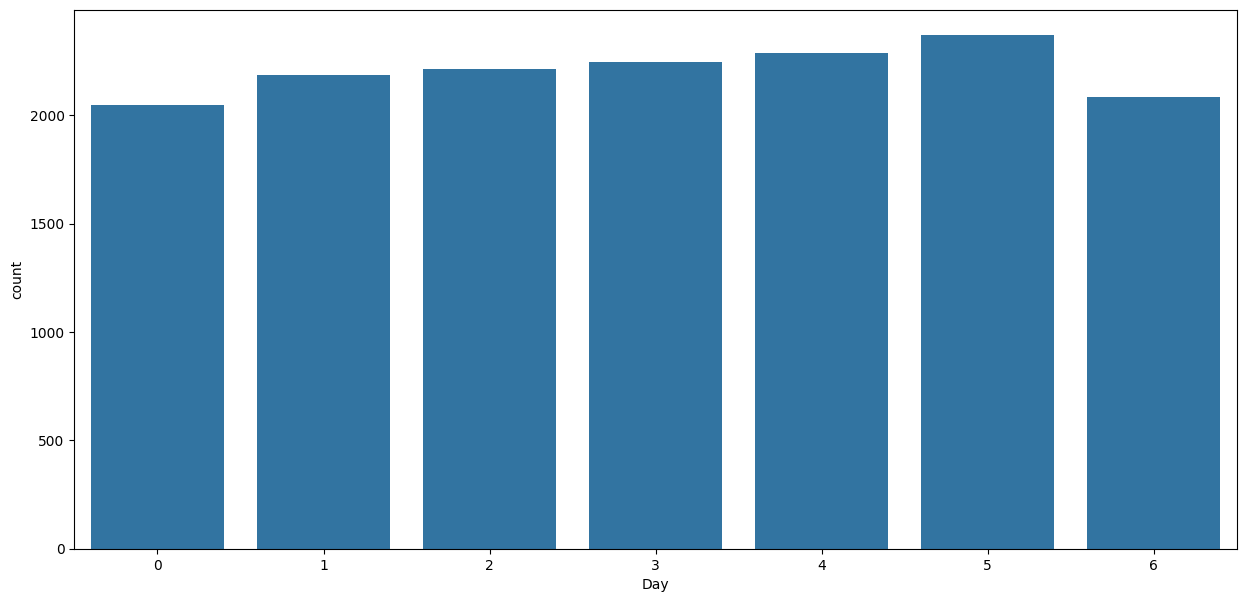

In [175]:
# impact of the day on the cab rides
plt.figure(figsize = (15,7))
sns.countplot(x = 'Day', data = train)

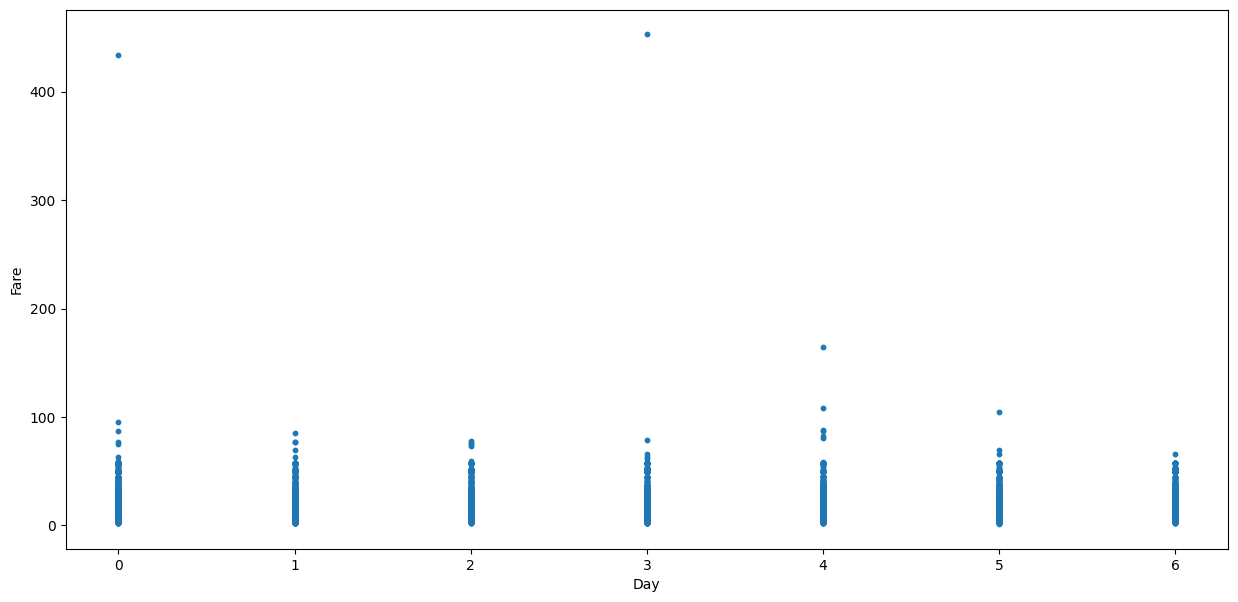

In [177]:
# relatuionship between the day of the week ansd fare
plt.figure(figsize = (15,7))
plt.scatter(x = train['Day'], y = train['fare_amount'], s =10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

In [178]:
# the cab fares was highest on sunday, monday, thrusday while it was lowest on wednesday saturday
# cabs rides were lowest

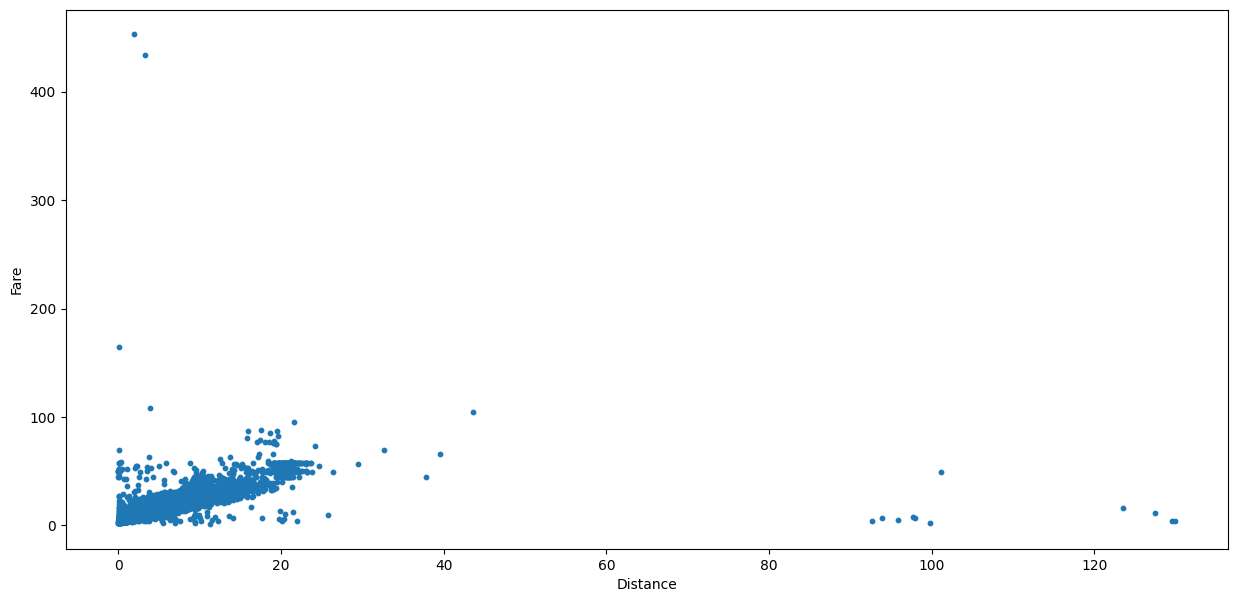

In [180]:
# relationship between distance and fare
plt.figure(figsize = (15,7))
plt.scatter(x = train['distance'], y = train['fare_amount'], s =10)
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

In [ ]:
# distance increases fare will also increases

In [181]:
# feature Scaling

In [182]:
# normality check for the training data for the cab fare and distance

fare_amount


C:\Users\DELL\AppData\Local\Temp\ipykernel_5672\4012568922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i], bins = 'auto', color = 'green')


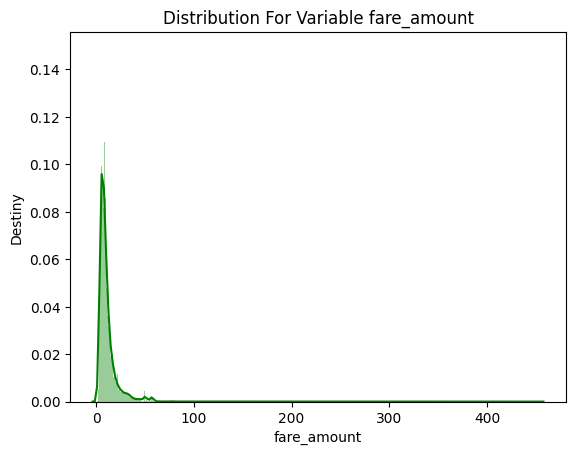

distance


C:\Users\DELL\AppData\Local\Temp\ipykernel_5672\4012568922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i], bins = 'auto', color = 'green')


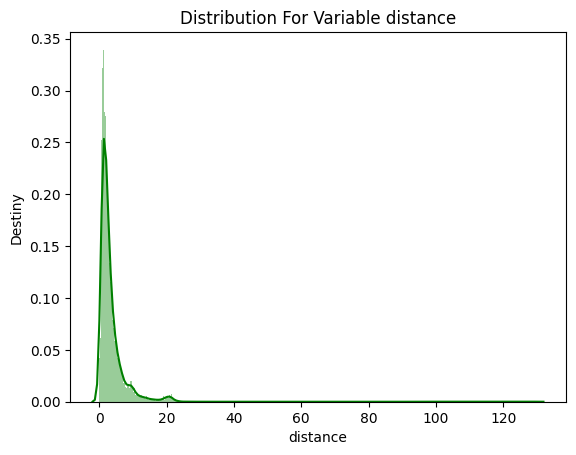

In [188]:
for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i], bins = 'auto', color = 'green')
    plt.title("Distribution For Variable " +i)
    plt.ylabel("Destiny")
    plt.show()

In [189]:
# since the fare amount is highly skewed applying log transformation to reduce the skewness
train['fare_amount'] = np.log1p(train['fare_amount'])

# since the distance is highly skewed applying log transformation to reduce the skewness
train['distance'] = np.log1p(train['distance'])

fare_amount


C:\Users\DELL\AppData\Local\Temp\ipykernel_5672\349448994.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i], bins = 'auto', color = 'green')


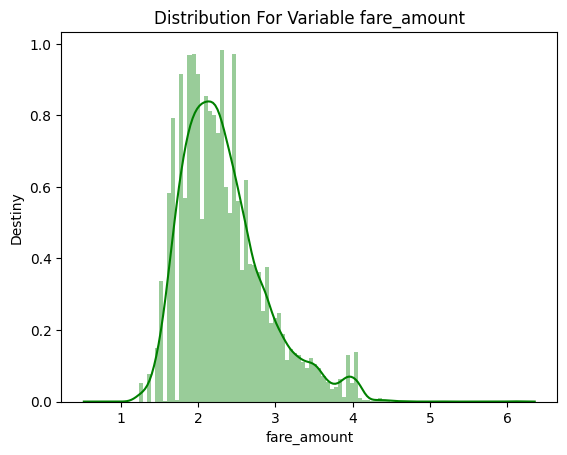

distance


C:\Users\DELL\AppData\Local\Temp\ipykernel_5672\349448994.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i], bins = 'auto', color = 'green')


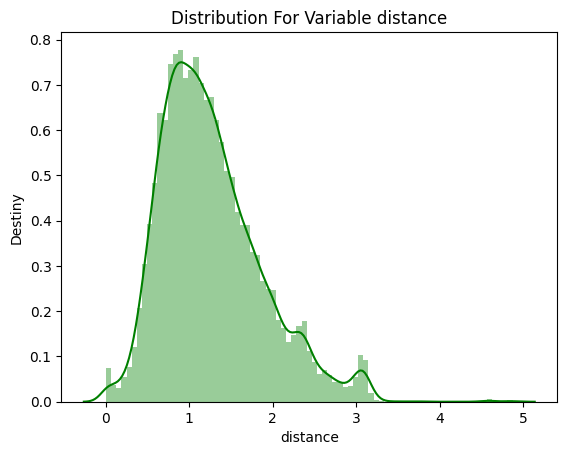

In [190]:
# normality re-check  the data is uniformly distributed or not after log transformation

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i], bins = 'auto', color = 'green')
    plt.title("Distribution For Variable " +i)
    plt.ylabel("Destiny")
    plt.show()

distance


C:\Users\DELL\AppData\Local\Temp\ipykernel_5672\2140233688.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[i], bins = 'auto', color = 'green')


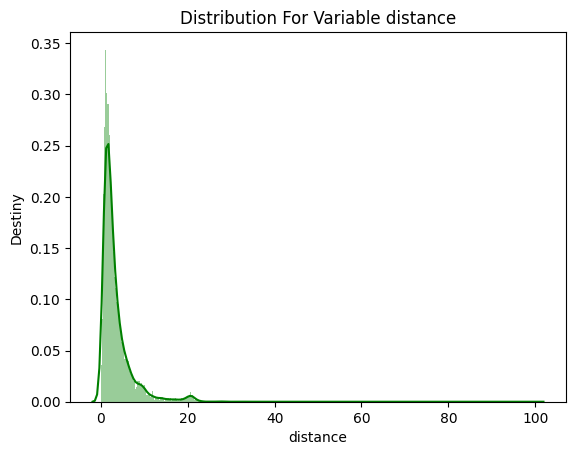

In [192]:
# normality check for the test data for the cab fare and distance

for i in ['distance']:
    print(i)
    sns.distplot(test[i], bins = 'auto', color = 'green')
    plt.title("Distribution For Variable " +i)
    plt.ylabel("Destiny")
    plt.show()

distance


C:\Users\DELL\AppData\Local\Temp\ipykernel_5672\445406738.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[i], bins = 'auto', color = 'green')


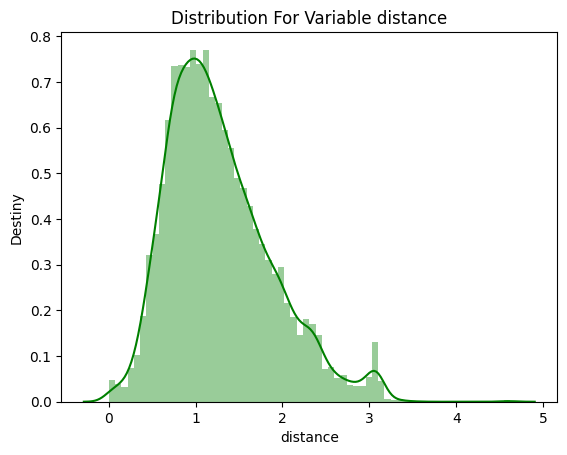

In [193]:
# normality re-check  the data is uniformly distributed or not after log transformation

# since the distance is highly skewed applying log transformation to reduce the skewness
test['distance'] = np.log1p(test['distance'])

for i in ['distance']:
    print(i)
    sns.distplot(test[i], bins = 'auto', color = 'green')
    plt.title("Distribution For Variable " +i)
    plt.ylabel("Destiny")
    plt.show()

In [ ]:
# after applying log transformation the skewed has already converted into normal distribution so there is no need for log standarization and normalization. We have already got the bell curve

In [ ]:
# Data Modeling- applying Machine learning Algorithms

In [196]:
# applying train test split on the dataset
x_train, x_test, y_train, y_test =  train_test_split(train.iloc[:,train.columns != 'fare_amount'], train.iloc[:, 0], test_size = 0.2, random_state = 1)

In [197]:
x_train

,passenger_count,Year,Month,Date,Day,Hour,distance
7690,2,2012,5,16,2,6,1.691253
13018,1,2014,7,11,4,10,0.828231
12950,3,2009,6,27,5,17,0.980620
14009,1,2009,6,12,4,15,0.534072
2816,5,2013,5,18,5,20,1.141300
...,...,...,...,...,...,...,...
994,1,2009,3,24,1,11,1.465260
5454,1,2014,1,11,5,18,0.666875
12682,6,2014,1,7,1,9,1.437090
259,1,2013,5,2,3,3,0.803939


In [198]:
x_test

,passenger_count,Year,Month,Date,Day,Hour,distance
1950,1,2011,6,17,4,9,0.875383
11386,1,2014,10,10,4,23,1.886420
9920,1,2012,11,13,1,20,2.560544
12161,5,2013,7,7,6,12,0.181758
13578,1,2013,8,15,3,13,1.499759
...,...,...,...,...,...,...,...
9462,2,2009,2,21,5,12,0.761909
89,2,2015,3,4,2,14,0.463667
1520,1,2009,12,16,2,9,1.571316
11914,1,2014,4,14,0,22,1.242760


In [199]:
y_train

7690     2.370244
13018    2.014903
12950    2.014903
14009    1.629241
2816     2.890372
           ...   
994      2.687847
5454     1.704748
12682    2.917771
259      1.945910
13919    3.462606
Name: fare_amount, Length: 12339, dtype: float64

In [200]:
y_test

1950     1.960095
11386    3.020425
9920     3.349904
12161    1.504077
13578    2.674149
           ...   
9462     1.704748
89       1.791759
1520     2.766319
11914    2.197225
2672     2.116256
Name: fare_amount, Length: 3085, dtype: float64

In [201]:
print(x_train.shape)
print(x_test.shape)

(12339, 7)
(3085, 7)


In [202]:
print(y_train.shape)
print(y_test.shape)

(12339,)
(3085,)


In [203]:
type(y_train)

pandas.core.series.Series

In [ ]:
# Linear Regression

In [204]:
# Building model on the top of the training dataset
fit_LR = LinearRegression().fit(x_train, y_train)

In [205]:
# prediction on the train data
pred_train_LR = fit_LR.predict(x_train)

In [206]:
# prediction on the test data
pred_test_LR = fit_LR.predict(x_test)

In [207]:
# calculating RMSE for the test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

# calculating RMSE for the train data
RMSE_train_LR = np.sqrt(mean_squared_error(y_train, pred_train_LR))

In [208]:
print("ROOT MEAN SQUARE ERROR FOR THE TRAINING DATA = " + str(RMSE_train_LR))
print("ROOT MEAN SQUARE ERROR FOR THE TEST DATA = " + str(RMSE_test_LR))

ROOT MEAN SQUARE ERROR FOR THE TRAINING DATA = 0.2753110017967314
ROOT MEAN SQUARE ERROR FOR THE TEST DATA = 0.24540661786977747


In [209]:
# Calculate R^2 for the train data
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_LR)


0.7495502651880404

In [210]:
r2_score(y_test, pred_test_LR)

0.7827019104296598

In [ ]:
# Decsion Tree Model

In [211]:
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(x_train, y_train)

In [212]:
# prediction on the test data
pred_test_DT = fit_DT.predict(x_test)

In [213]:
# prediction on the train data
pred_train_DT = fit_DT.predict(x_train)

In [214]:
# calculating RMSE for the test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

# calculating RMSE for the train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

In [215]:
print("ROOT MEAN SQUARE ERROR FOR THE TRAINING DATA = " + str(RMSE_train_DT))
print("ROOT MEAN SQUARE ERROR FOR THE TEST DATA = " + str(RMSE_test_DT))

ROOT MEAN SQUARE ERROR FOR THE TRAINING DATA = 0.2996210902077019
ROOT MEAN SQUARE ERROR FOR THE TEST DATA = 0.2867460617158617


In [216]:
# Calculate R^2 for the train data
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_DT)

0.7033678616157003

In [217]:
r2_score(y_test, pred_test_LR)

0.7827019104296598

In [ ]:
# Random Forest Model

In [220]:
fit_RF = RandomForestRegressor(n_estimators = 200).fit(x_train, y_train)

In [221]:
# prediction on the test data
pred_test_RF = fit_RF.predict(x_test)

In [224]:
# prediction on the train data
pred_train_RF = fit_DT.predict(x_train)

In [225]:
# calculating RMSE for the test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

# calculating RMSE for the train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))

In [226]:
print("ROOT MEAN SQUARE ERROR FOR THE TRAINING DATA = " + str(RMSE_train_RF))
print("ROOT MEAN SQUARE ERROR FOR THE TEST DATA = " + str(RMSE_test_RF))

ROOT MEAN SQUARE ERROR FOR THE TRAINING DATA = 0.2996210902077019
ROOT MEAN SQUARE ERROR FOR THE TEST DATA = 0.23519935461123112


In [227]:
# Calculate R^2 for the train data
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_RF)

0.7033678616157003

In [228]:
r2_score(y_test, pred_test_RF)

0.8004022601530675

In [ ]:
# Gradient Boosting

In [229]:
fit_GB = GradientBoostingRegressor().fit(x_train, y_train)

In [230]:
# prediction on the test data
pred_test_GB = fit_GB.predict(x_test)

In [231]:
# prediction on the train data
pred_train_GB = fit_GB.predict(x_train)

In [232]:
# calculating RMSE for the test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

# calculating RMSE for the train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))

In [233]:
print("ROOT MEAN SQUARE ERROR FOR THE TRAINING DATA = " + str(RMSE_train_GB))
print("ROOT MEAN SQUARE ERROR FOR THE TEST DATA = " + str(RMSE_test_GB))

ROOT MEAN SQUARE ERROR FOR THE TRAINING DATA = 0.22754316149645537
ROOT MEAN SQUARE ERROR FOR THE TEST DATA = 0.2273776019989618


In [234]:
# Calculate R^2 for the train data
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_GB)

0.8289193000175024

In [235]:
r2_score(y_test, pred_test_GB)

0.8134570966878933

In [236]:
#  Parameter Tuning

In [237]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# look at parameter used by our current post
print("PARAMETER CURRENTLY IN USE :\n")
pprint(rf.get_params())

PARAMETER CURRENTLY IN USE :

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [241]:
#  Random Hyperparameter Grid
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [243]:
#  random search cv on random forest model
RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))
# create a random grid
rand_grid = {'n_estimators' : n_estimator, 'max_depth' : depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state = 0)
random_rf = randomcv_rf.fit(x_train, y_train)
predictions_RRF = randomcv_rf.predict(x_test)

view_best_params_RRF = randomcv_rf.best_params_
best_model = randomcv_rf.best_estimator_
predictions_RRF = best_model.predict(x_test)

# r^2
RRF_r2 = r2_score(y_test, predictions_RRF)
# calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test, predictions_RRF))
print("RANDOM SEARCH CV RANDOM FOREST REGRESSOR MODEL PERFORMANCE : ")
print("BEST PARAMETERS = ",view_best_params_RRF)
print("R-SQUARED = {:0.2}", format(RRF_r2))
print("RMSE = ", RRF_rmse)

RANDOM SEARCH CV RANDOM FOREST REGRESSOR MODEL PERFORMANCE : 
BEST PARAMETERS =  {'n_estimators': 15, 'max_depth': 9}
R-SQUARED = {:0.2} 0.796750667820839
RMSE =  0.2373410611350033


In [245]:
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint
# look at parameter used by our current post
print("PARAMETER CURRENTLY IN USE :\n")
pprint(rf.get_params())

PARAMETER CURRENTLY IN USE :

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [247]:
#  random search cv on random forest model
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))
# create a random grid
rand_grid = {'n_estimators' : n_estimator, 'max_depth' : depth}

randomcv_gb = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state = 0)
random_gb = randomcv_gb.fit(x_train, y_train)
predictions_gb = randomcv_gb.predict(x_test)

view_best_params_gb = randomcv_gb.best_params_
best_model = randomcv_rf.best_estimator_
predictions_gb = best_model.predict(x_test)

# r^2
gb_r2 = r2_score(y_test, predictions_gb)
# calculating RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test, predictions_gb))
print("RANDOM SEARCH CV RANDOM FOREST REGRESSOR MODEL PERFORMANCE : ")
print("BEST PARAMETERS = ",view_best_params_gb)
print("R-SQUARED = {:0.2}", format(gb_r2))
print("RMSE = ", gb_rmse)

RANDOM SEARCH CV RANDOM FOREST REGRESSOR MODEL PERFORMANCE : 
BEST PARAMETERS =  {'n_estimators': 15, 'max_depth': 9}
R-SQUARED = {:0.2} 0.796750667820839
RMSE =  0.2373410611350033


In [252]:
# Grid Search CV on random forest

GRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))
# create a grid search
grid_search = {'n_estimators' : n_estimator, 'max_depth' : depth}

gridcv_rf = GridSearchCV(GRF, param_grid = grid_search, cv = 5)
gridcv_RF = gridcv_rf.fit(x_train, y_train)
predictions_GRF = gridcv_rf.predict(x_test)

view_best_params_GRF = gridcv_RF.best_params_
best_model = gridcv_RF.best_estimator_
predictions_GRF = best_model.predict(x_test)

# r^2
GRF_r2 = r2_score(y_test, predictions_GRF)
# calculating RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test, predictions_GRF))
print("GRID SEARCH CV RANDOM FOREST REGRESSOR MODEL PERFORMANCE : ")
print("BEST PARAMETERS = ",view_best_params_GRF)
print("R-SQUARED = {:0.2}", format(GRF_r2))
print("RMSE = ", GRF_rmse)

GRID SEARCH CV RANDOM FOREST REGRESSOR MODEL PERFORMANCE : 
BEST PARAMETERS =  {'max_depth': 7, 'n_estimators': 15}
R-SQUARED = {:0.2} 0.7971315961456371
RMSE =  0.23711854543717428


In [253]:
# Grid Search CV on Gardient Boosting

GGB = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))
# create a grid search
grid_search = {'n_estimators' : n_estimator, 'max_depth' : depth}

gridcv_gb = GridSearchCV(GGB, param_grid = grid_search, cv = 5)
gridcv_GB = gridcv_gb.fit(x_train, y_train)
predictions_GRF = gridcv_GB.predict(x_test)

view_best_params_GGB = gridcv_GB.best_params_
best_model = gridcv_GB.best_estimator_
predictions_GGB = best_model.predict(x_test)

# r^2
GGB_r2 = r2_score(y_test, predictions_GGB)
# calculating RMSE
GGB_rmse = np.sqrt(mean_squared_error(y_test, predictions_GGB))
print("GRID SEARCH CV GRADIENT BOOSTING REGRESSOR MODEL PERFORMANCE : ")
print("BEST PARAMETERS = ",view_best_params_GGB)
print("R-SQUARED = {:0.2}", format(GGB_r2))
print("RMSE = ", GGB_rmse)


GRID SEARCH CV GRADIENT BOOSTING REGRESSOR MODEL PERFORMANCE : 
BEST PARAMETERS =  {'max_depth': 5, 'n_estimators': 19}
R-SQUARED = {:0.2} 0.7969200804507159
RMSE =  0.23724212611002213


In [254]:
# Prediction for the test dataset
# Grid search cross validation for random forest

regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))
# create a grid search
grid_search = {'n_estimators' : n_estimator, 'max_depth' : depth}
# grid-search cross-validation for 5 fold cv
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_RF = gridcv_rf.fit(x_train, y_train)
view_best_params_GRF = gridcv_GB.best_params_
# applying model on the test data
predictions_GRF_test = gridcv_RF.predict(test)
predictions_GRF_test

array([2.37543359, 2.39413478, 1.68070503, ..., 4.00620024, 3.30834716,
       2.04017073])

In [255]:
test['Predicted_Fare'] = predictions_GRF_test
test.head()

,passenger_count,Year,Month,Date,Day,Hour,distance,Predicted_Fare
0,1,2015,1,27,1,13,1.200946,2.375434
1,1,2015,1,27,1,13,1.231205,2.394135
2,1,2011,10,8,5,11,0.481579,1.680705
3,1,2012,12,1,5,21,1.085538,2.218272
4,1,2012,12,1,5,21,1.854312,2.786595


In [256]:
test.to_csv('test.csv')